In [3]:
import pandas as pd
avocados = pd.read_pickle("avoplotto.pkl")
print(avocados)

            date          type  year  avg_price         size      nb_sold
0     2015-12-27  conventional  2015       0.95        small   9626901.09
1     2015-12-20  conventional  2015       0.98        small   8710021.76
2     2015-12-13  conventional  2015       0.93        small   9855053.66
3     2015-12-06  conventional  2015       0.89        small   9405464.36
4     2015-11-29  conventional  2015       0.99        small   8094803.56
5     2015-11-22  conventional  2015       0.96        small   8571849.80
6     2015-11-15  conventional  2015       0.92        small   9907981.27
7     2015-11-08  conventional  2015       0.97        small   9991330.31
8     2015-11-01  conventional  2015       0.97        small  10138703.85
9     2015-10-25  conventional  2015       1.04        small   8683958.80
10    2015-10-18  conventional  2015       0.99        small   9162094.14
11    2015-10-11  conventional  2015       1.00        small   8828340.53
12    2015-10-04  conventional  2015  

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


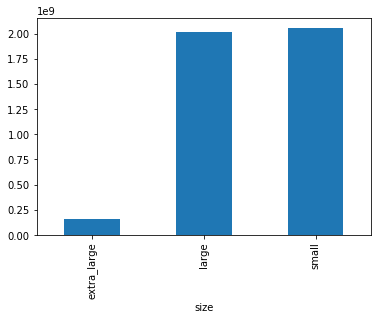

In [5]:
# 1. Which avocado size is most popular?
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

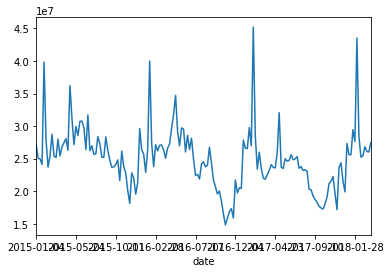

In [6]:
# 2. Changes in sales over time
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

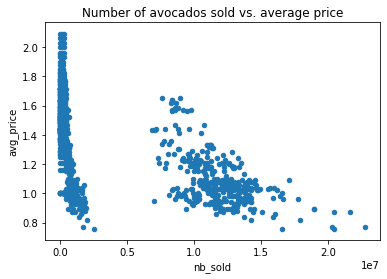

In [7]:
# 3. Avocado supply and demand
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price",kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

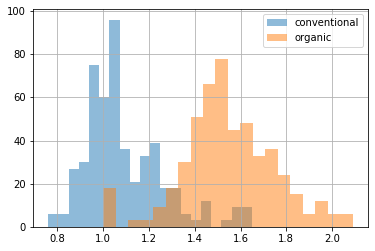

In [8]:
# 4. Price of conventional vs. organic avocados
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

Missing values represented as NA
.isna() True False 
.isna().any()
.isna().sum()
.dropna()
.fillna(0)


In [9]:
# 5. 
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

NameError: name 'avocados_2016' is not defined

In [ ]:
# 6. Removing missing values
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [ ]:
# 7. Replacing missing values
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

In [10]:
# 8. List of dictionaries
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-03     7835071    10376832
1  2019-11-10     8561348    10717154


In [11]:
#9. Dictionary of lists
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


Reading and writing CSVs

DF.read_csv("")
DF.to_csv("")

In [ ]:
# 10. CSV to DataFrame
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

In [ ]:
# 11. DataFrame to CSV
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")